In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d 'orvile/human-bone-fractures-image-dataset-hbfmid'

Dataset URL: https://www.kaggle.com/datasets/orvile/human-bone-fractures-image-dataset-hbfmid
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/38.1M [00:00<?, ?B/s]
100% 38.1M/38.1M [00:00<00:00, 1.01GB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/human-bone-fractures-image-dataset-hbfmid.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
!pip install -U albumentations

In [ ]:
!pip install -q ultralytics supervision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.7/206.7 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 32.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 45.4 MB/s eta 0:00:00


In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.167 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.8/107.7 GB disk)


In [ ]:
from ultralytics import YOLO
from IPython.display import display, Image

In [ ]:
import os
os.listdir("/content/Human Bone Fractures Multi-modal Image Dataset (HBFMID)")

['Bone Fractures Detection']

In [ ]:
!yolo task=detect \
  mode=train \
  model=yolov8n.yaml \
  data="/content/Human Bone Fractures Multi-modal Image Dataset (HBFMID)/Bone Fractures Detection/data.yaml" \
  epochs=50 \
  imgsz=416 \
  batch=4 \
  device=cpu \
  patience=20 \
  workers=0

Ultralytics 8.3.167 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=4, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Human Bone Fractures Multi-modal Image Dataset (HBFMID)/Bone Fractures Detection/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=416, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.yaml, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=Tr

Visualizing 9 training images


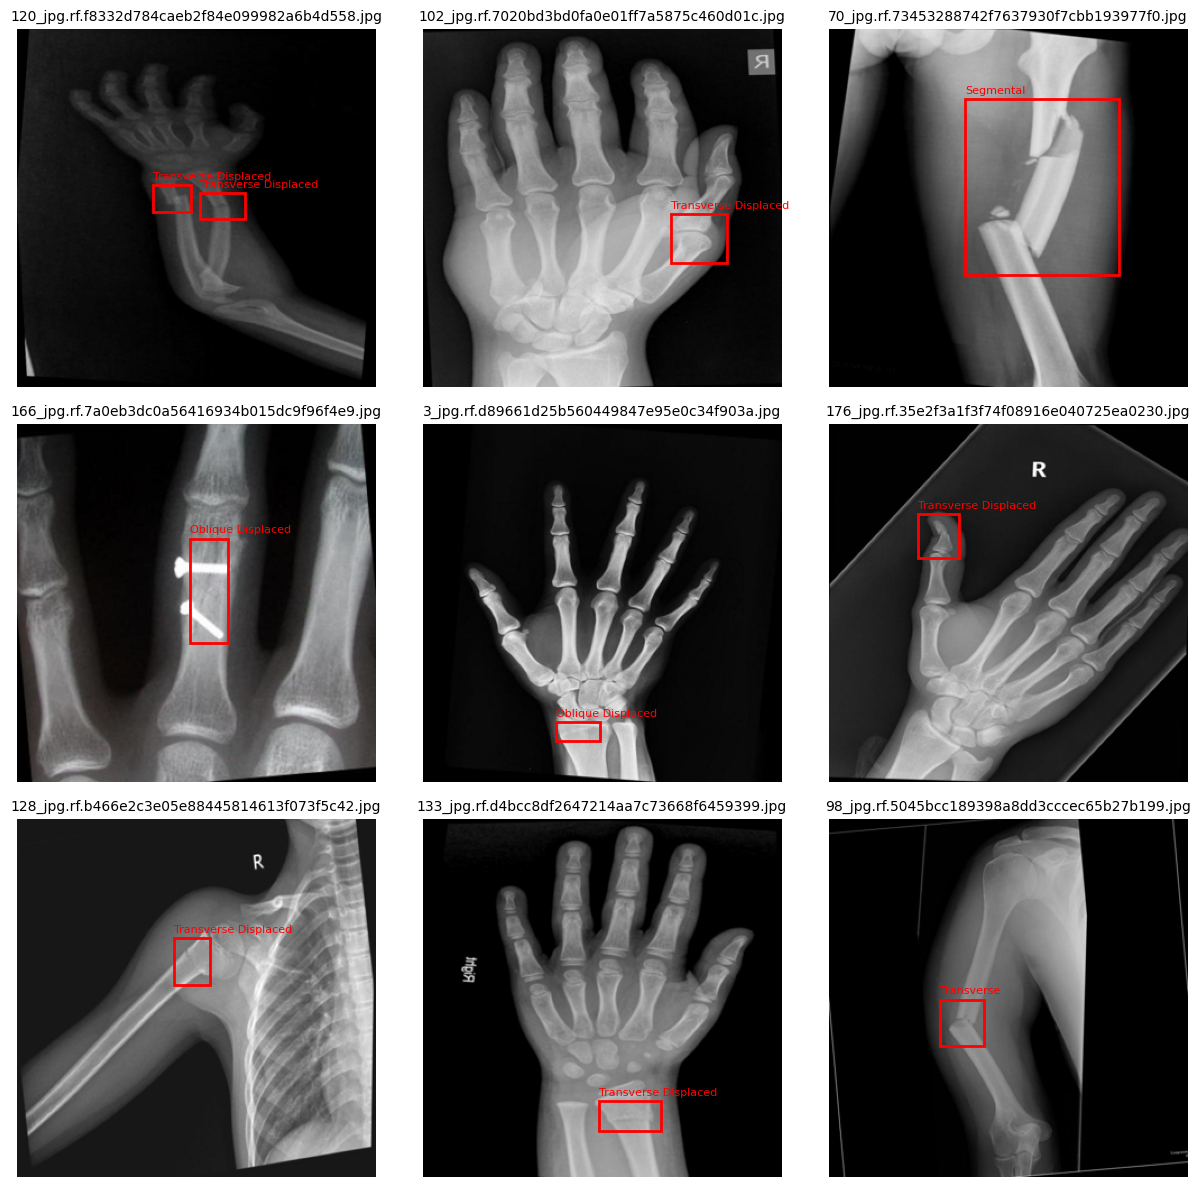

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import pathlib
import math

# Path lokal
train_images_dir = pathlib.Path("/content/Human Bone Fractures Multi-modal Image Dataset (HBFMID)/Bone Fractures Detection/train/images")
train_labels_dir = pathlib.Path("/content/Human Bone Fractures Multi-modal Image Dataset (HBFMID)/Bone Fractures Detection/train/labels")
train_images = list(train_images_dir.glob("*.jpg"))

# Limit jumlah gambar
max_images = 9
train_images = train_images[:max_images]

class_names = ['Comminuted', 'Greenstick', 'Healthy', 'Linear', 'Oblique Displaced',
               'Oblique', 'Segmental', 'Spiral', 'Transverse Displaced', 'Transverse']

n = len(train_images)
print(f"Visualizing {n} training images")

if n == 0:
    print("No images found in the directory. Please check the path.")
else:
    cols = 3
    rows = math.ceil(n / cols)
    fig, axes = plt.subplots(rows, cols, figsize=(12, 4 * rows))
    axes = axes.flatten()

    for i in range(n):
        img = Image.open(train_images[i]).resize((320, 320))
        axes[i].imshow(img)
        axes[i].axis("off")
        axes[i].set_title(train_images[i].name, fontsize=10)

        label_path = train_labels_dir / f"{train_images[i].stem}.txt"
        img_width, img_height = img.size

        if label_path.exists():
            with open(label_path, "r") as f:
                lines = f.readlines()

            for line in lines:
                values = line.strip().split()
                class_id = int(values[0])
                x_center, y_center, width, height = map(float, values[1:])
                x1 = int((x_center - width / 2) * img_width)
                y1 = int((y_center - height / 2) * img_height)
                box_width = int(width * img_width)
                box_height = int(height * img_height)

                rect = patches.Rectangle((x1, y1), box_width, box_height,
                                         linewidth=2, edgecolor="red", facecolor="none")
                axes[i].add_patch(rect)
                axes[i].text(x1, y1 - 5, class_names[class_id], color="red", fontsize=8)

    for j in range(n, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


In [ ]:
from IPython.display import Image, display

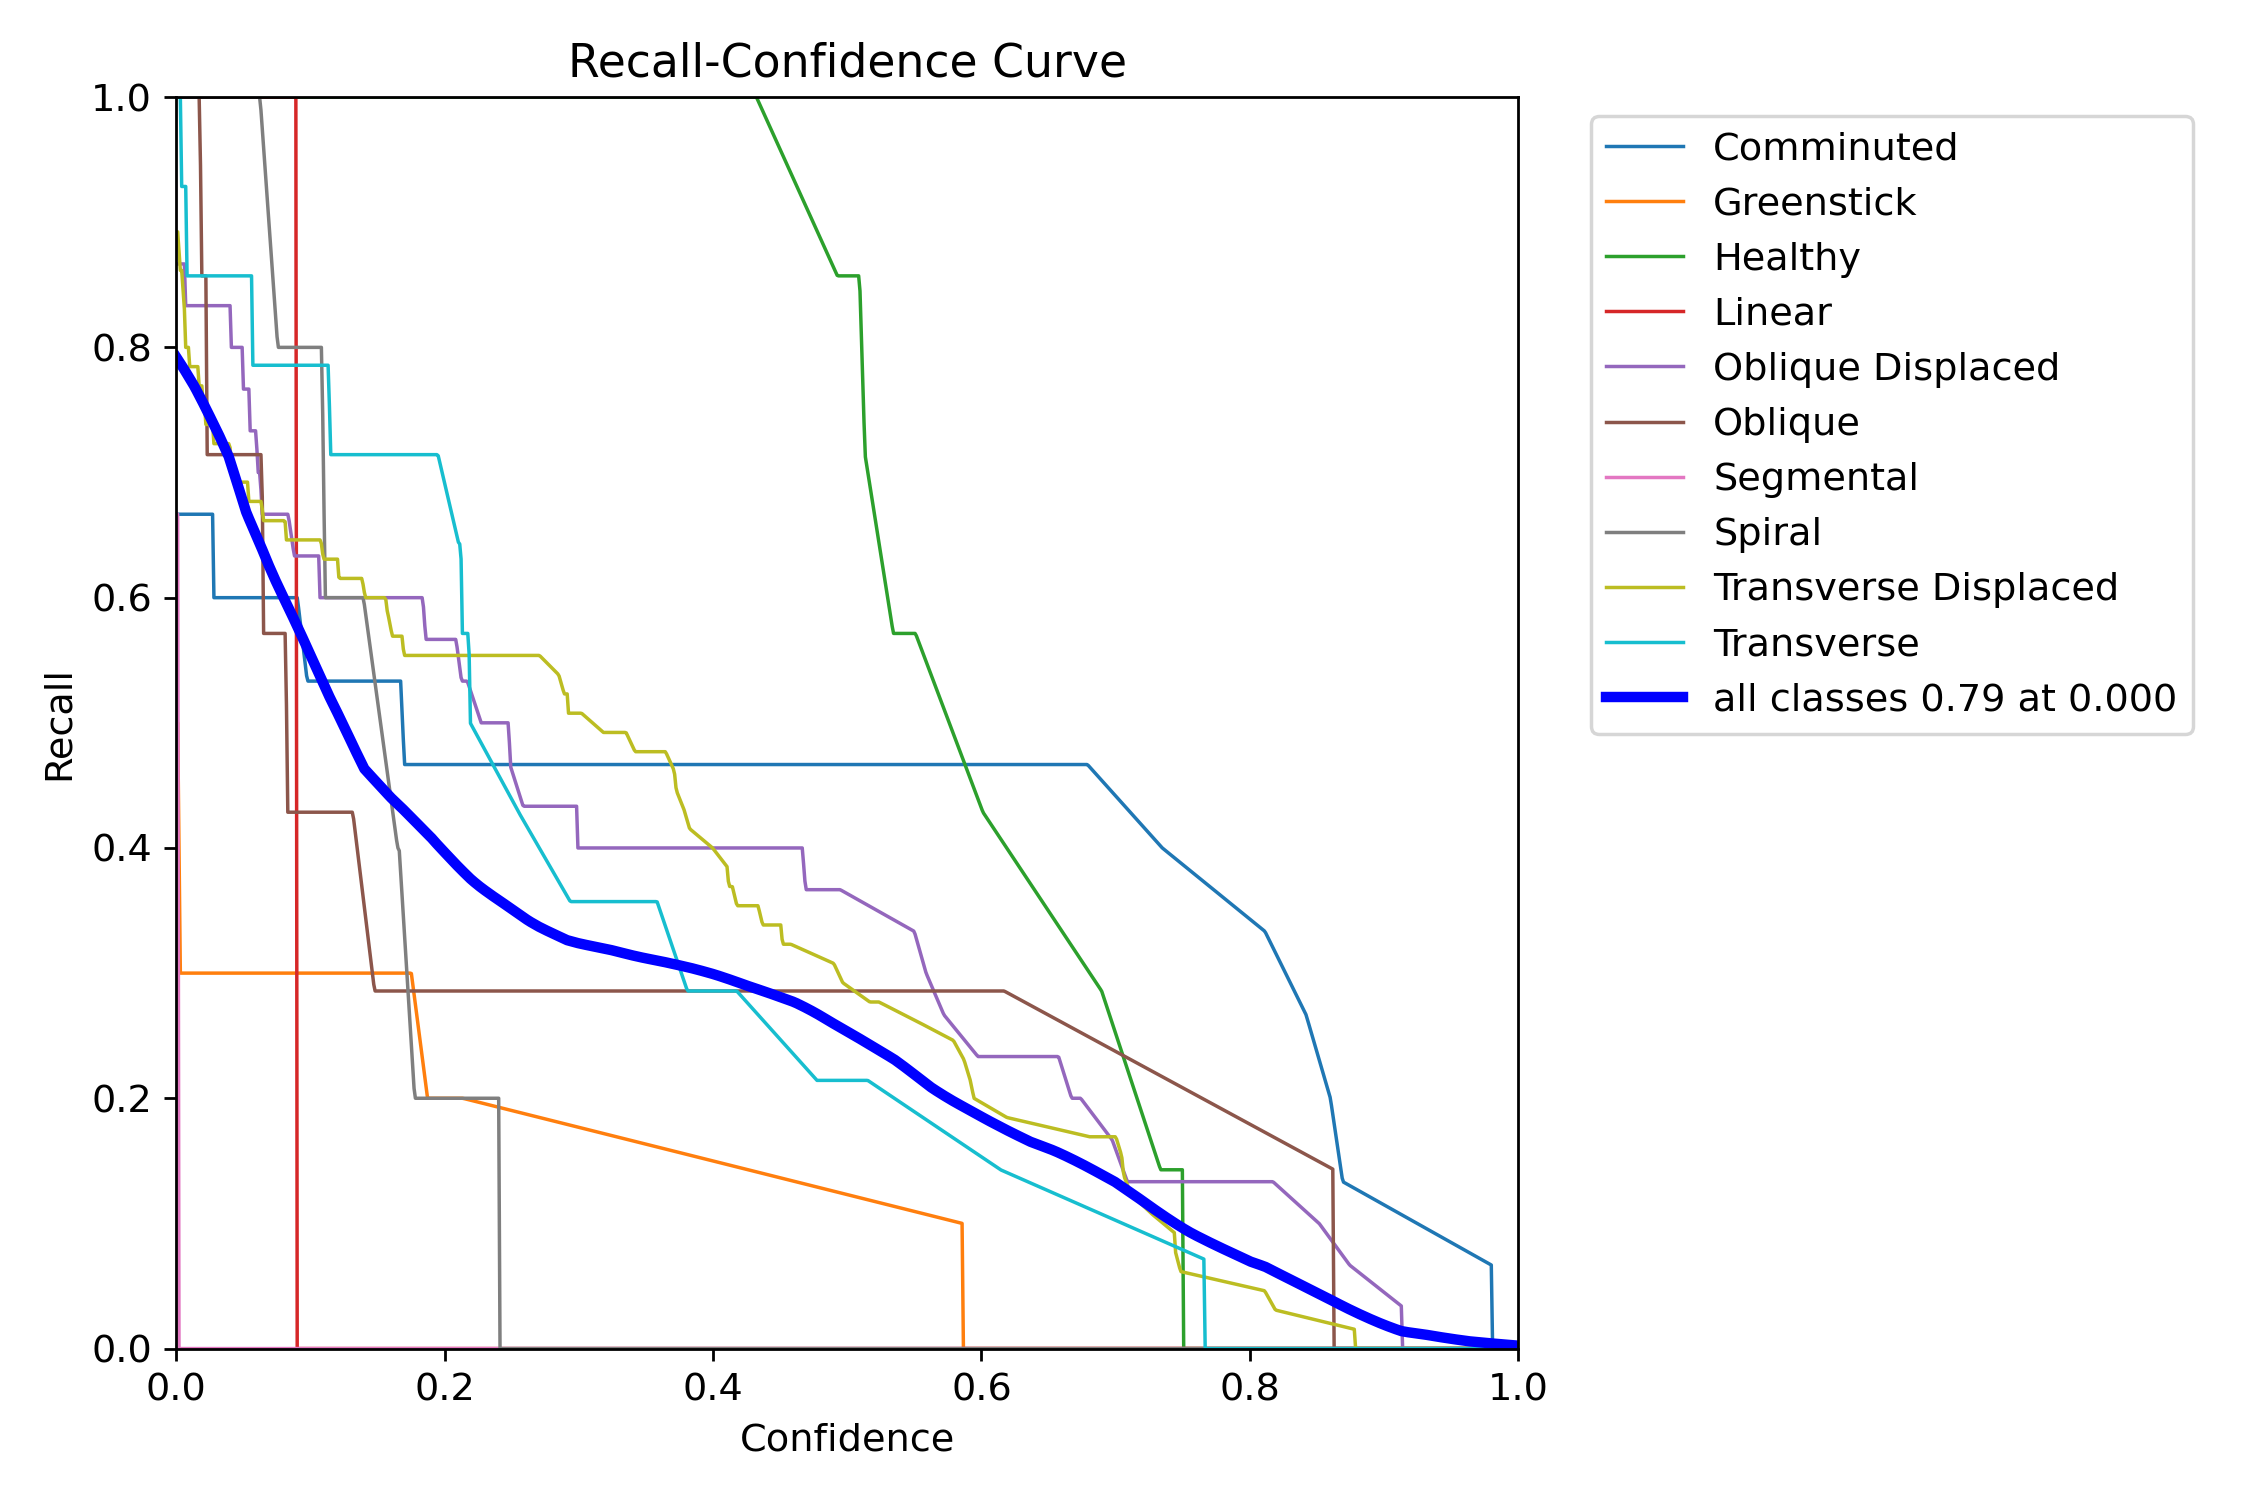

In [ ]:
display(Image(filename="/content/runs/detect/train/BoxR_curve.png", width=700))

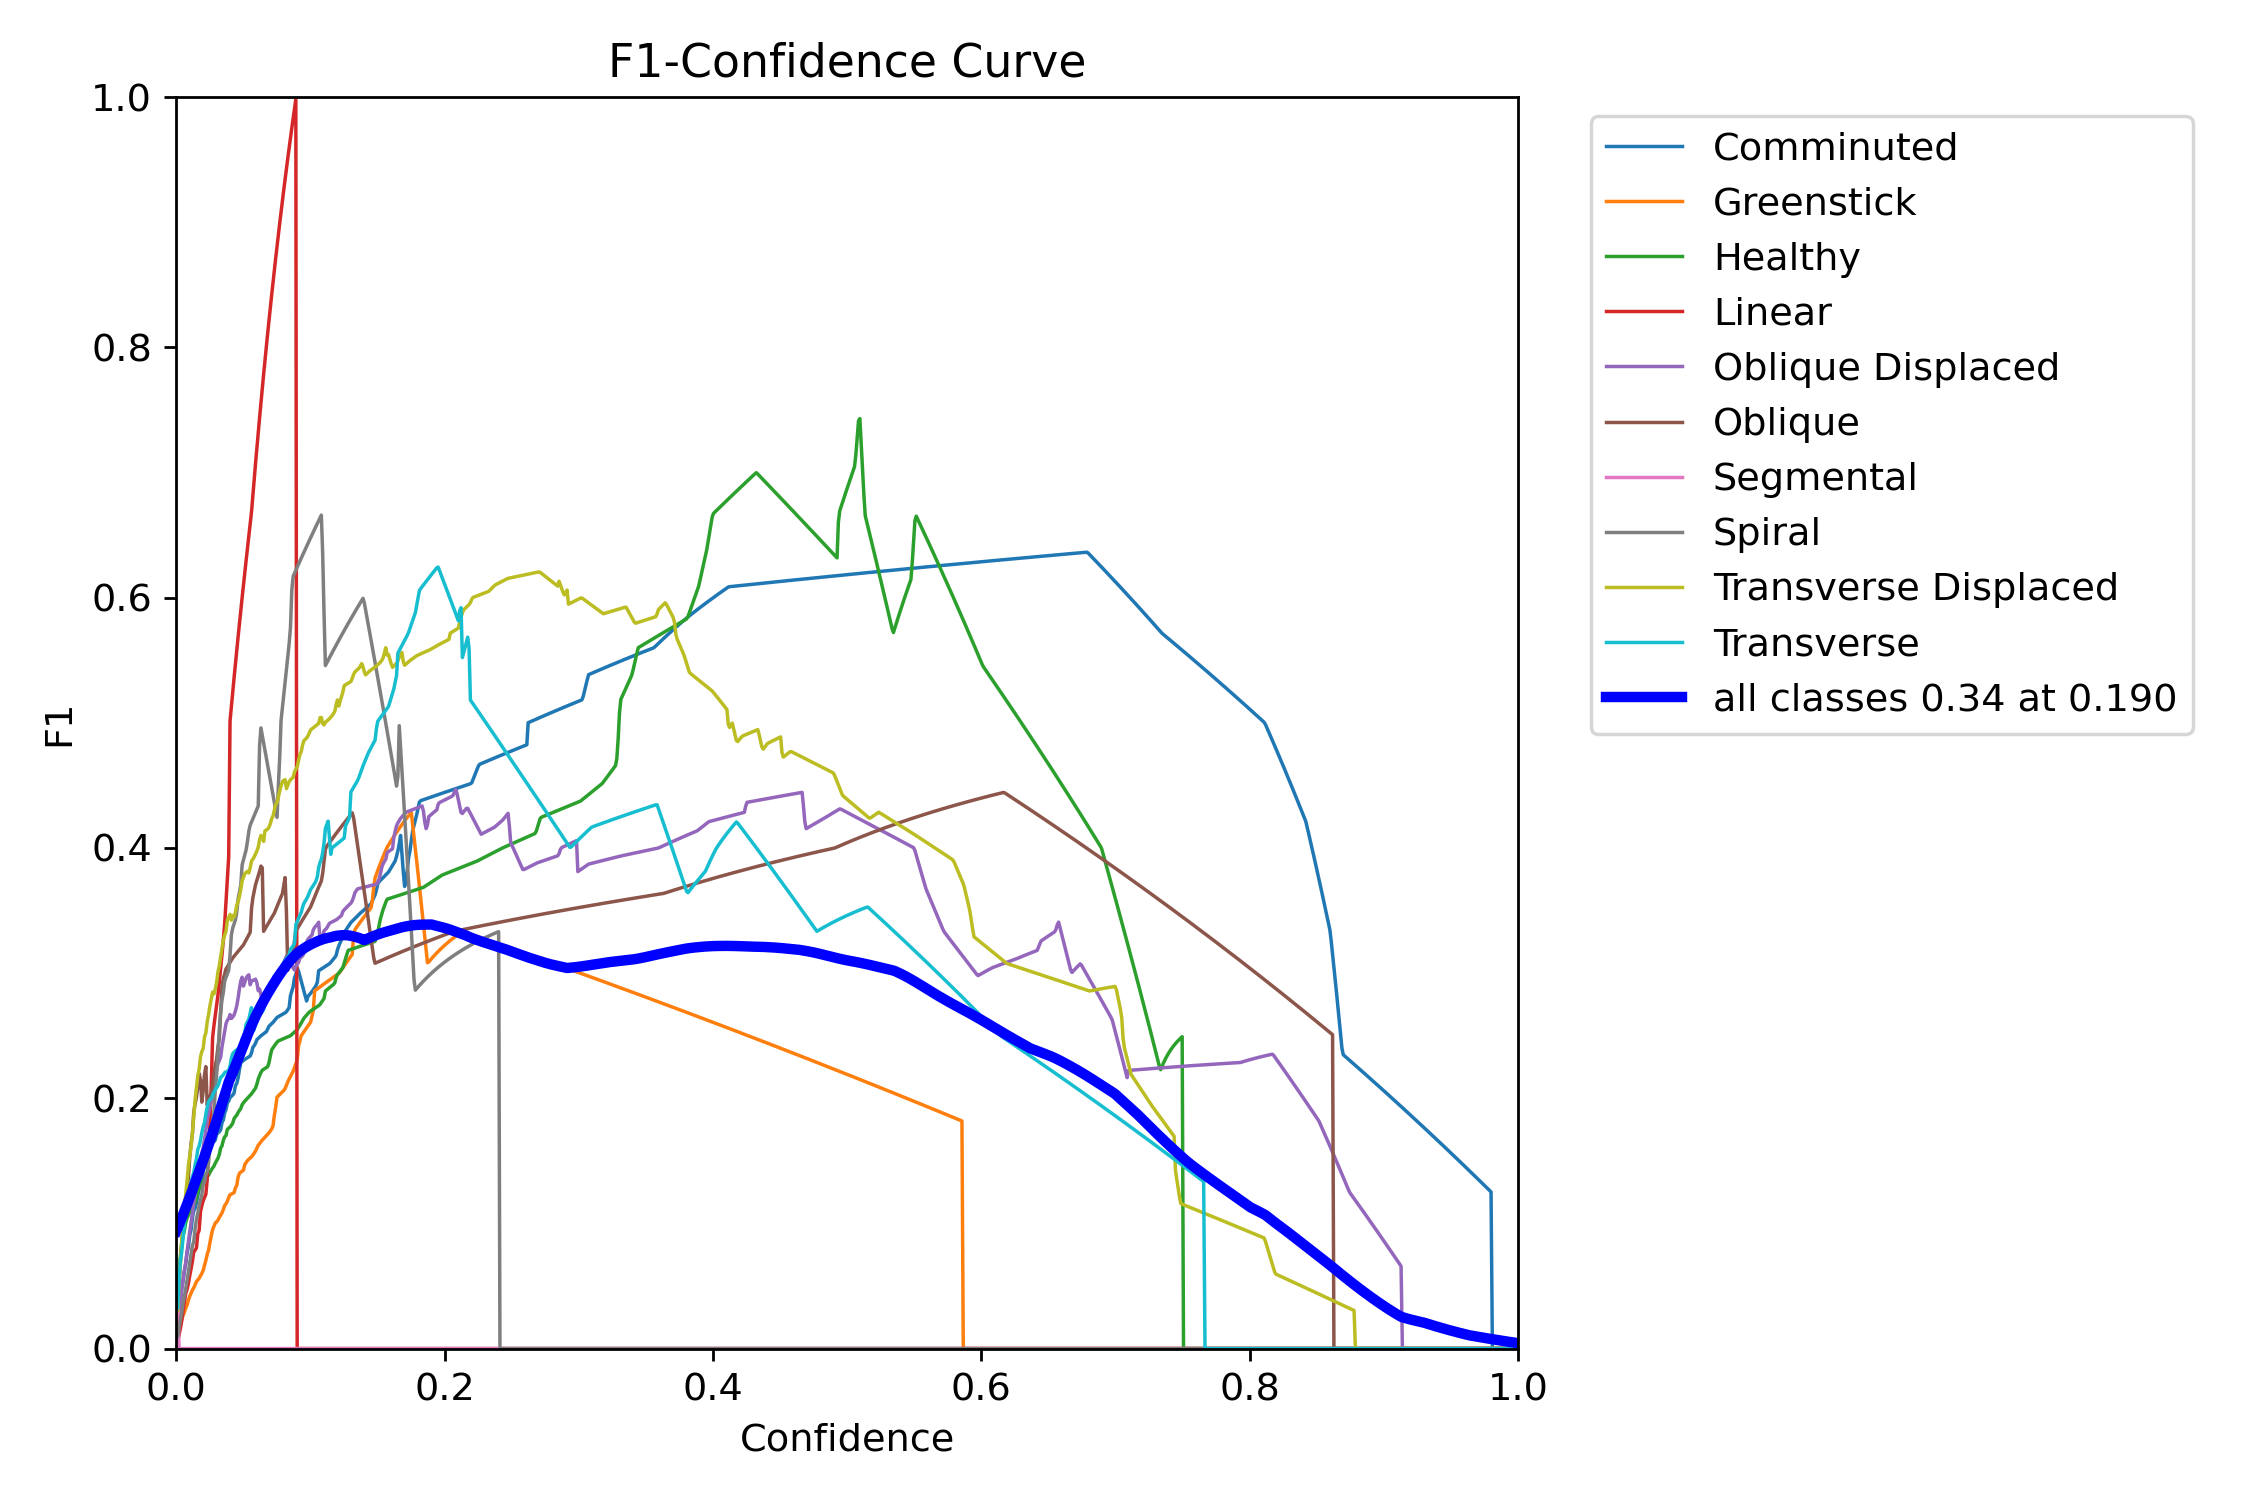

In [ ]:
display(Image(filename="/content/runs/detect/train/BoxF1_curve.png", width=700))

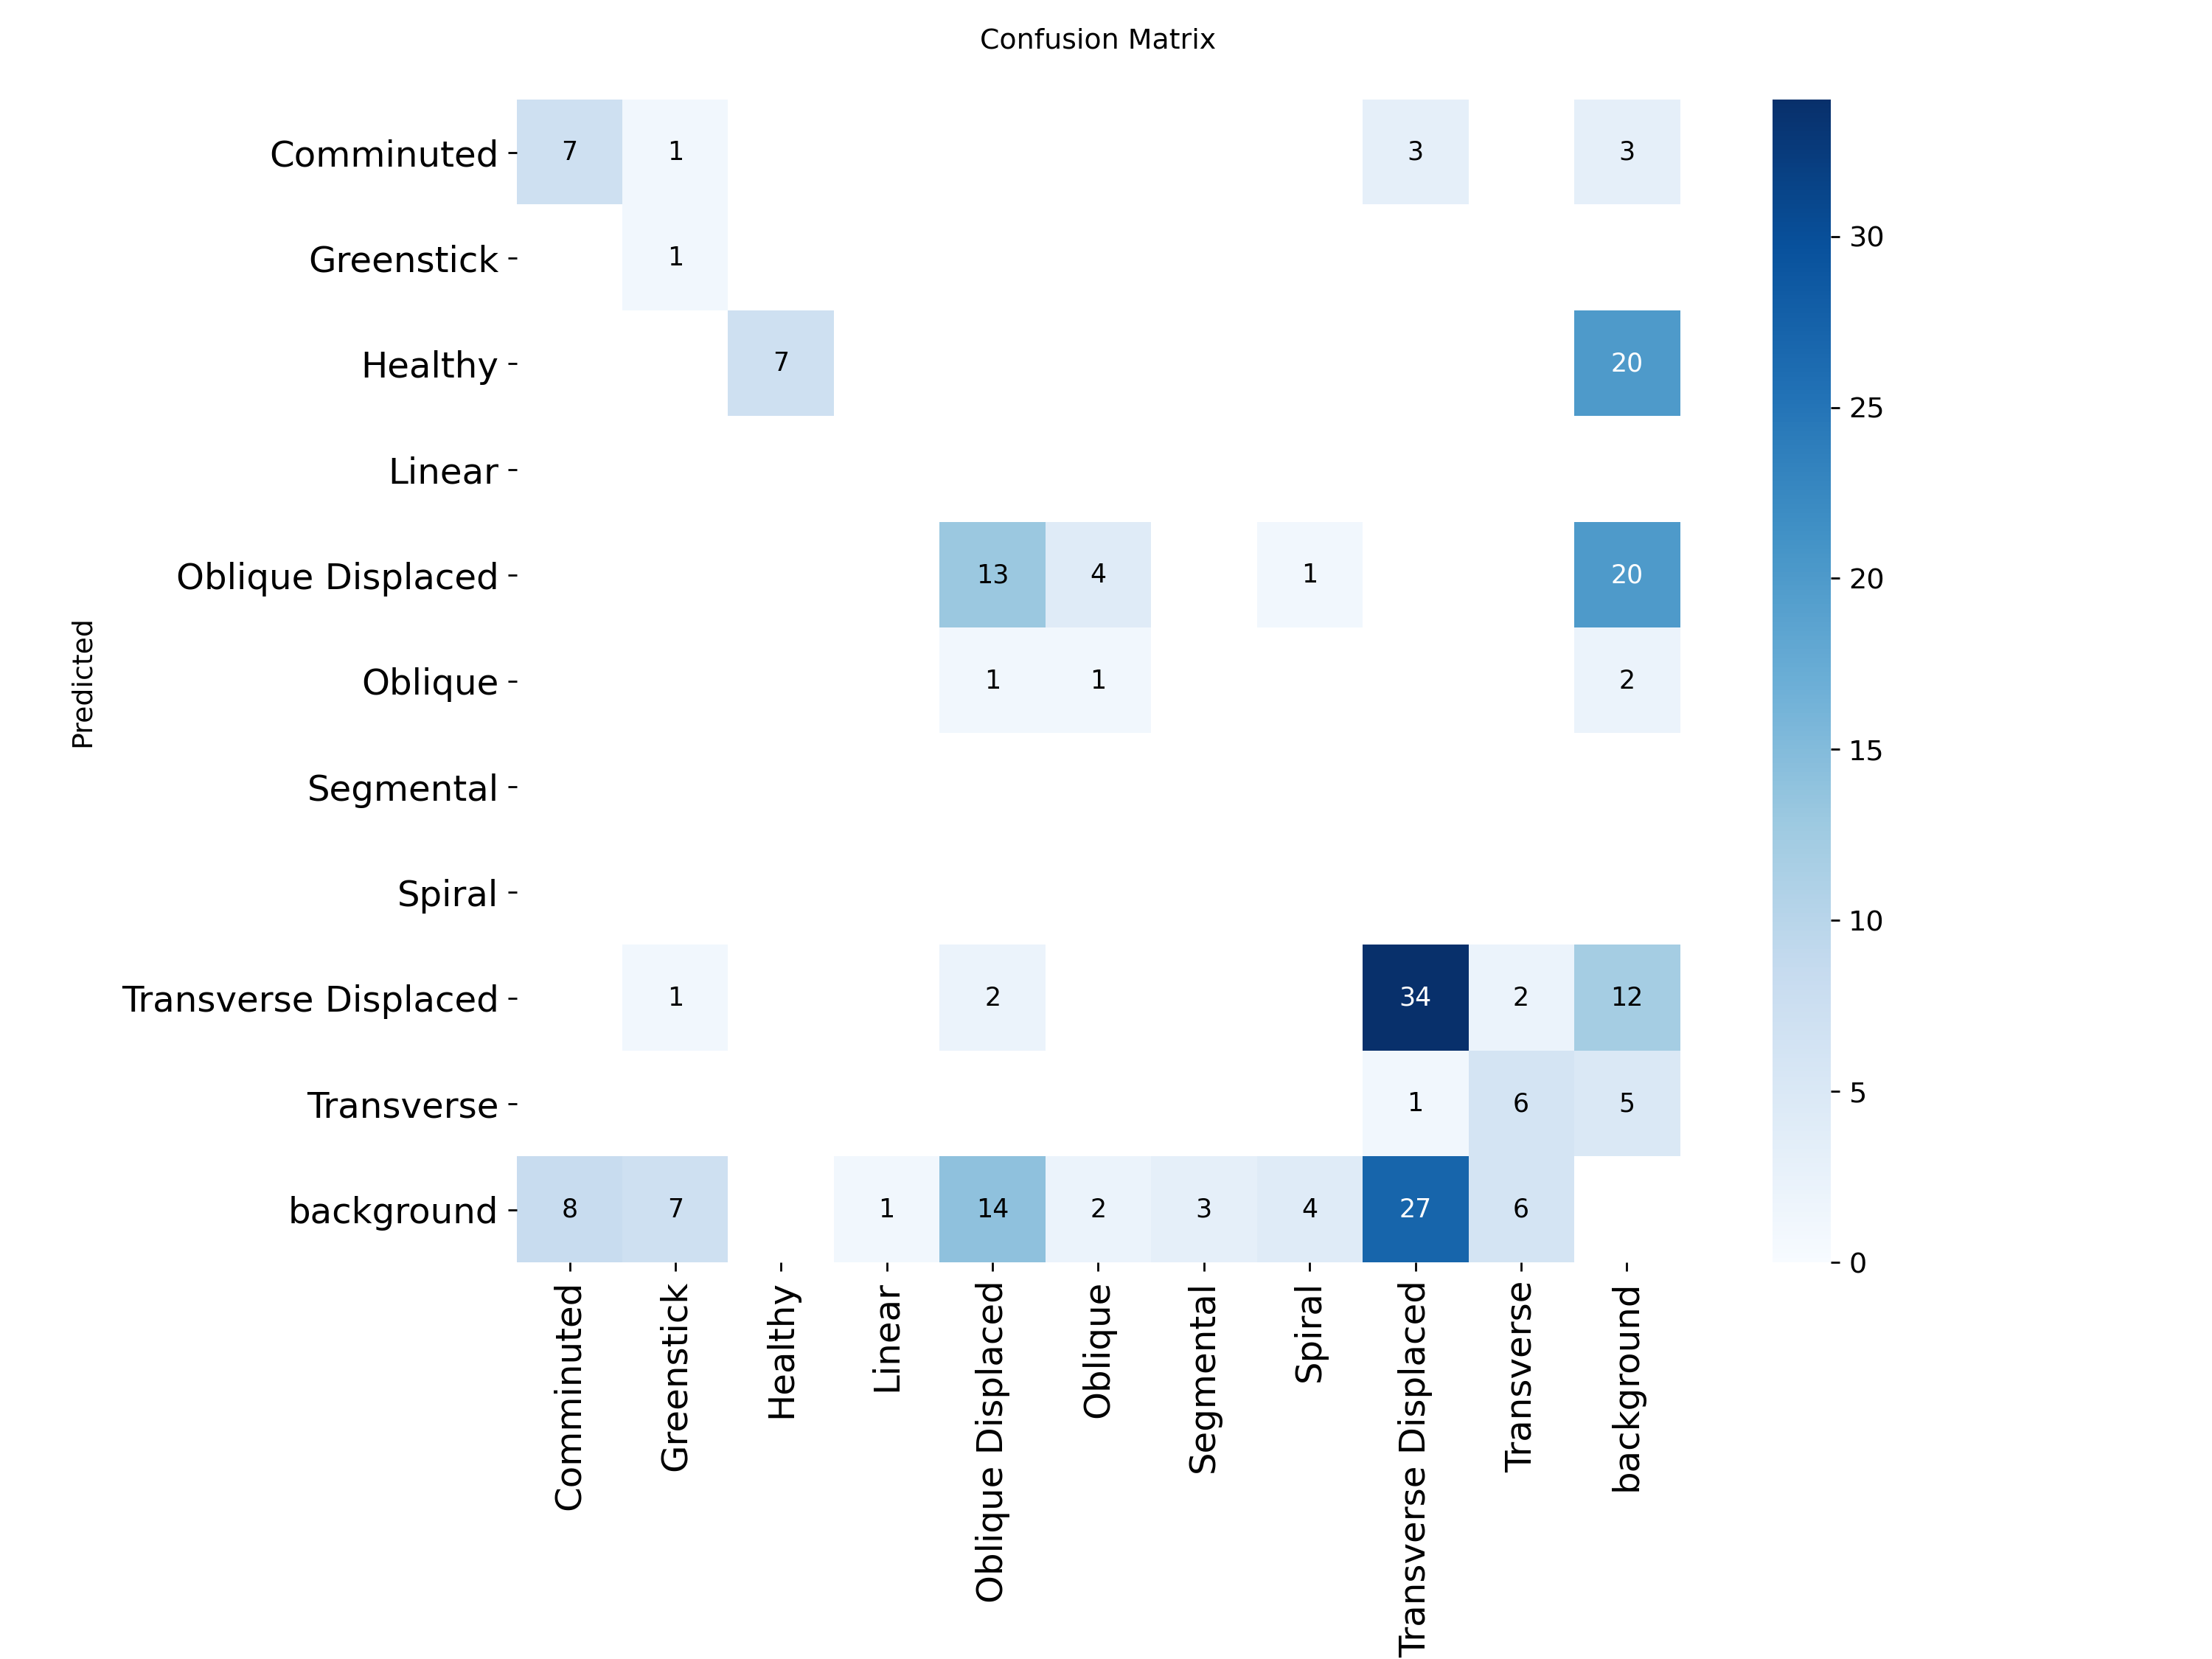

In [39]:
display(Image(filename="/content/runs/detect/train/confusion_matrix.png", width=700))

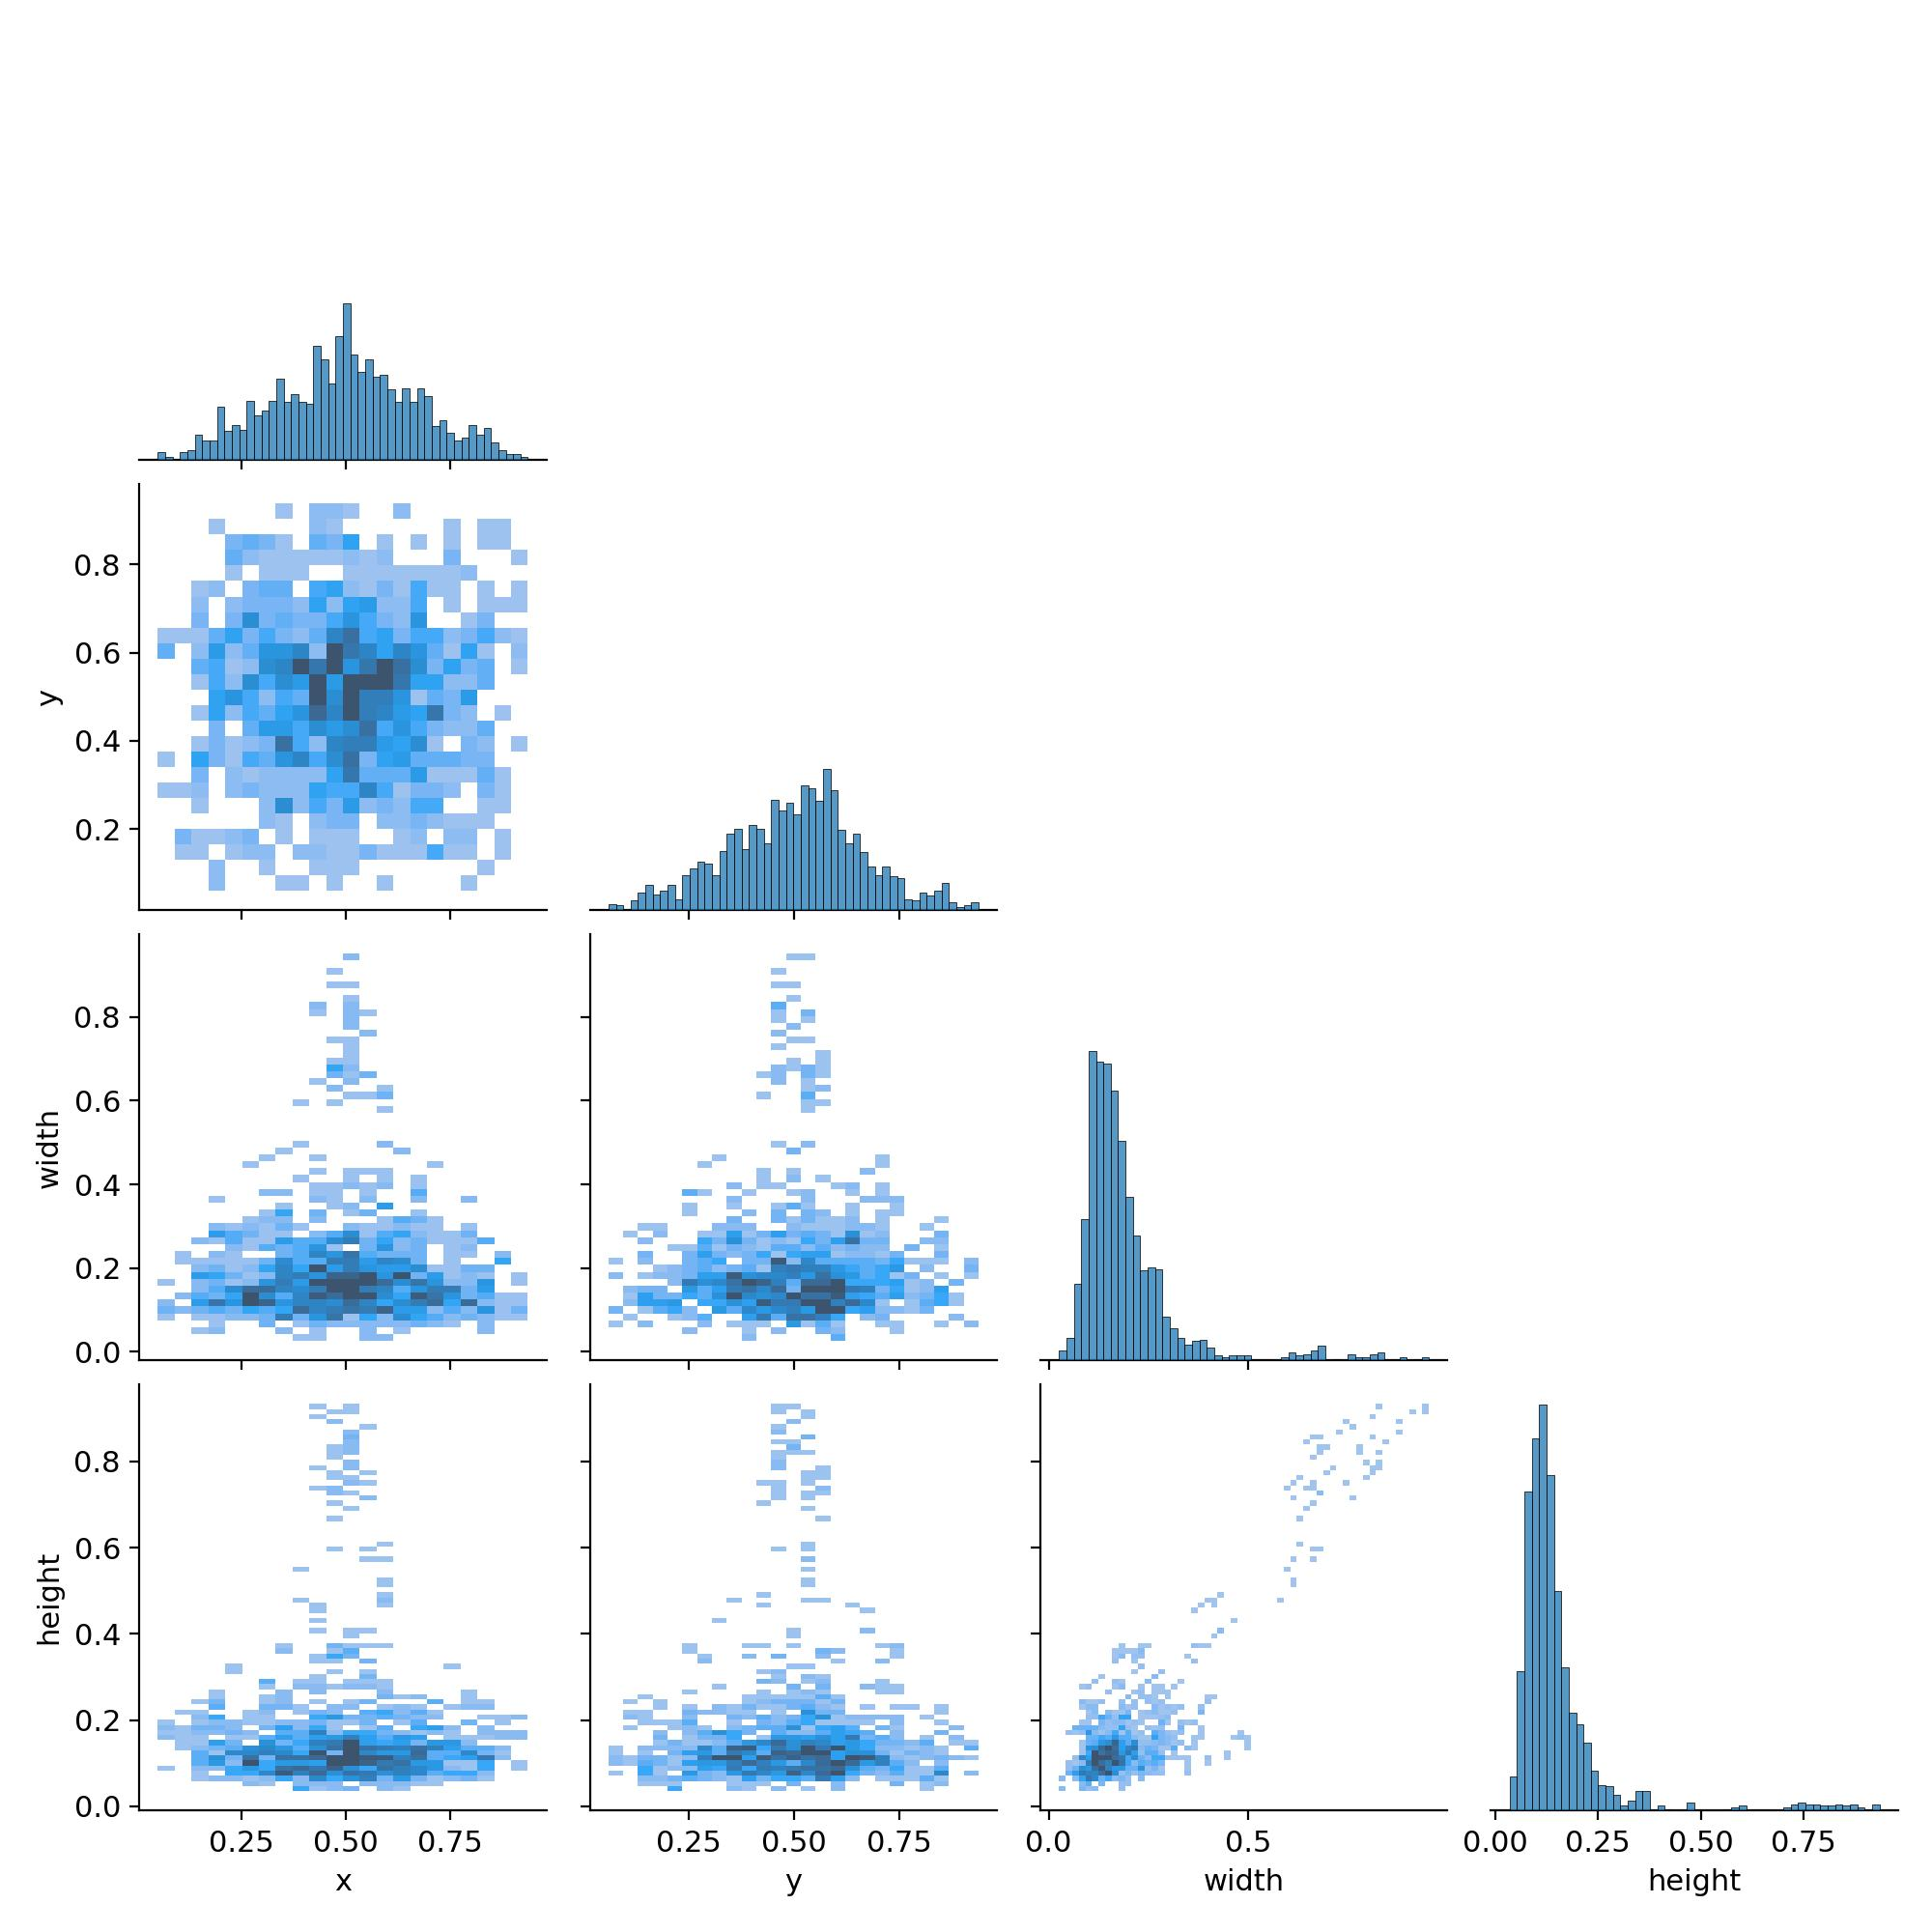

In [ ]:
display(Image(filename="/content/runs/detect/train/labels_correlogram.jpg", width=700))

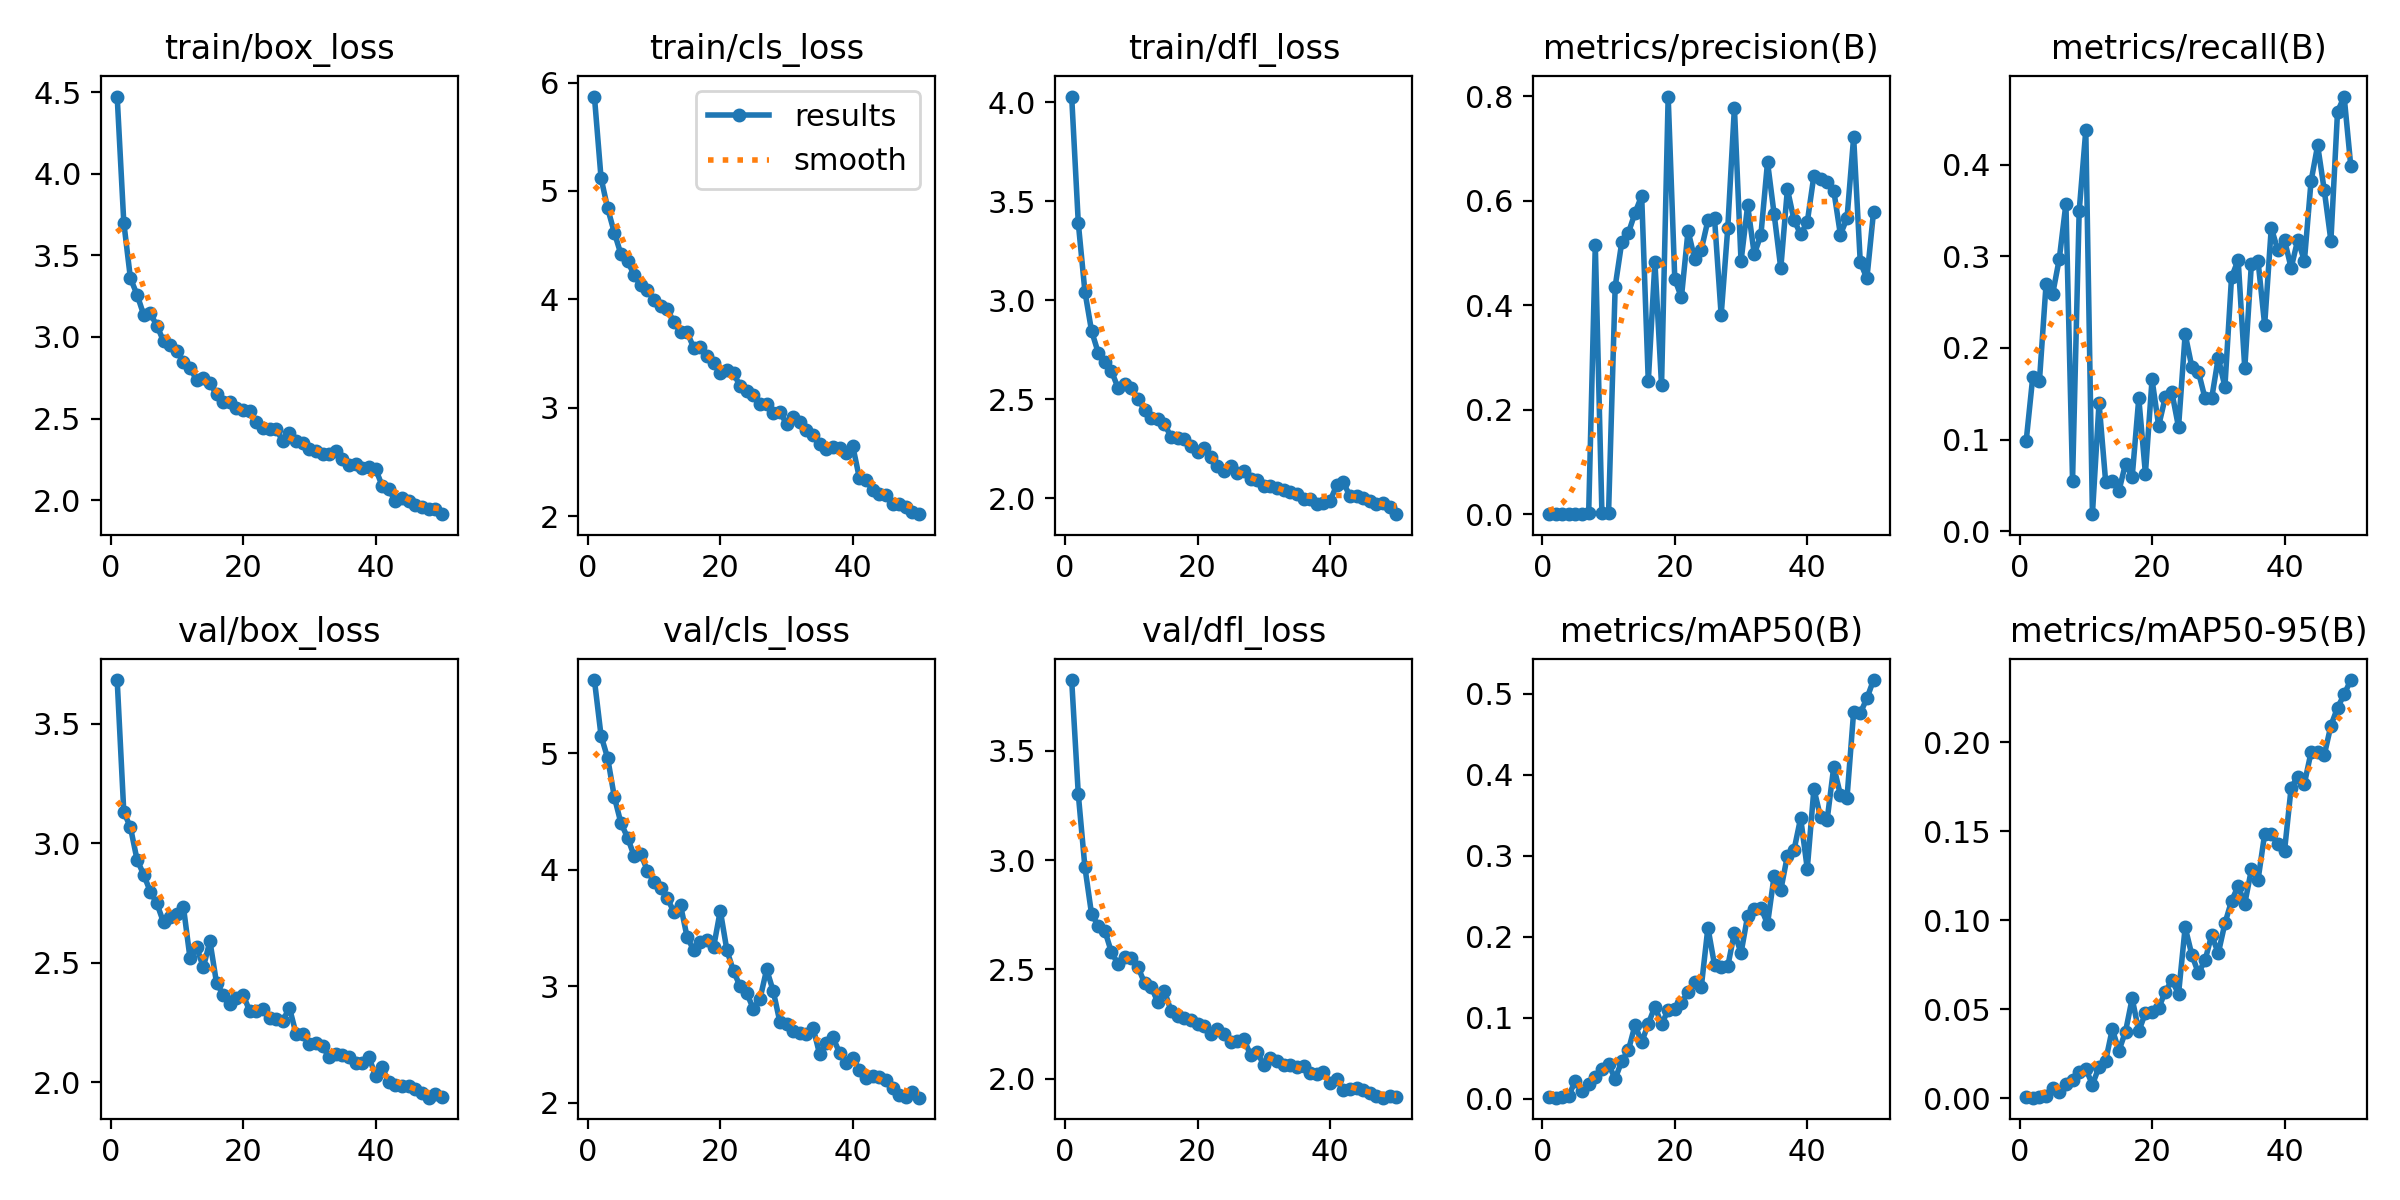

In [ ]:
display(Image(filename="/content/runs/detect/train/results.png", width=700))

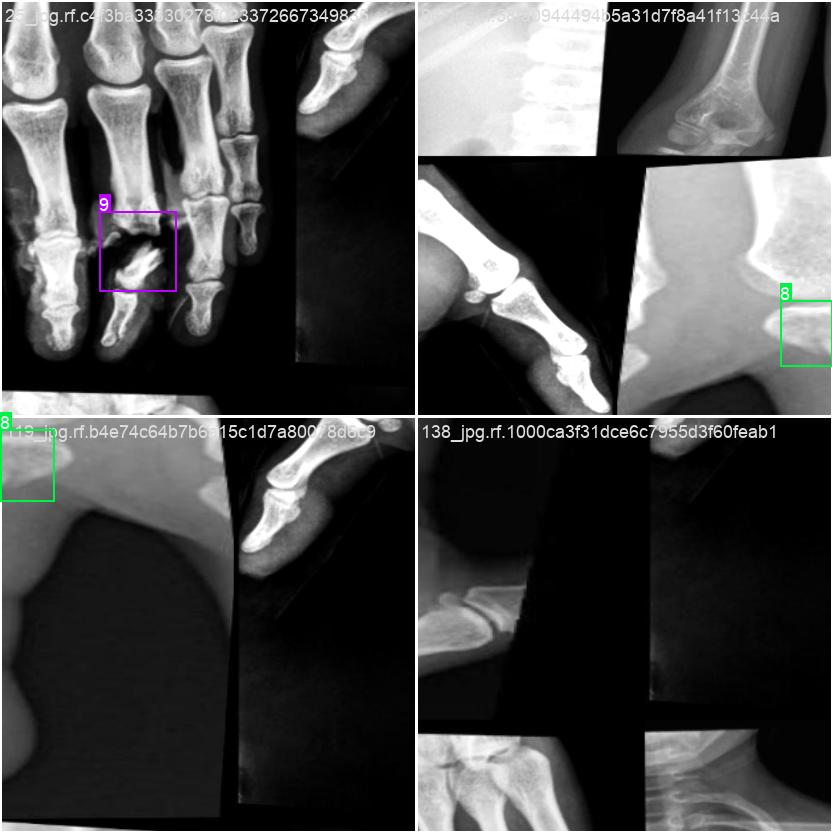

In [ ]:
display(Image(filename="/content/runs/detect/train/train_batch0.jpg", width=700))

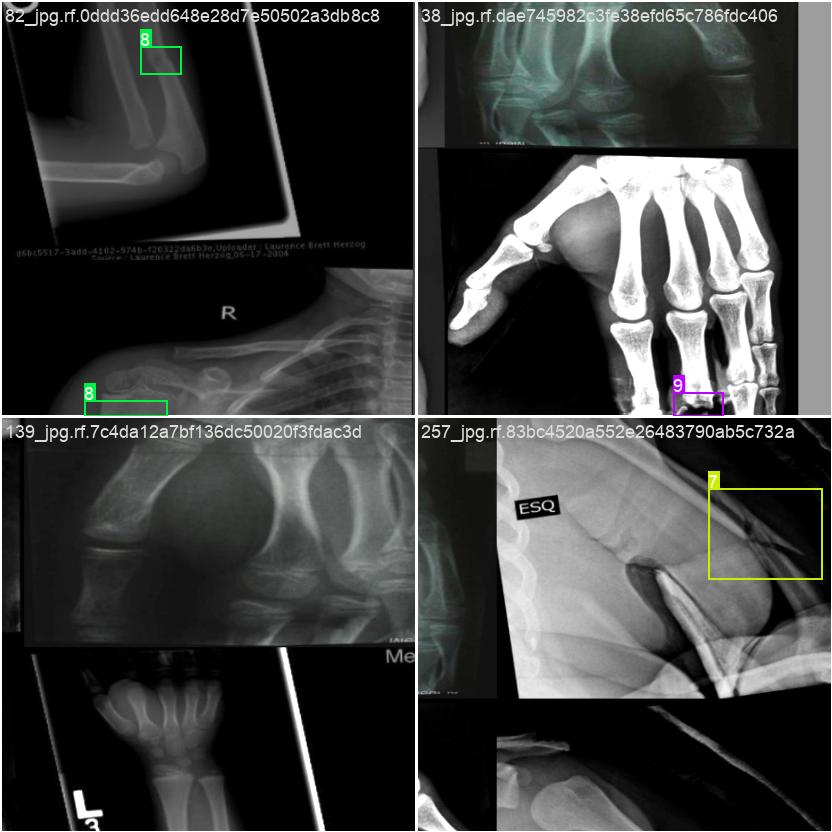

In [ ]:
display(Image(filename="/content/runs/detect/train/train_batch1.jpg", width=700))

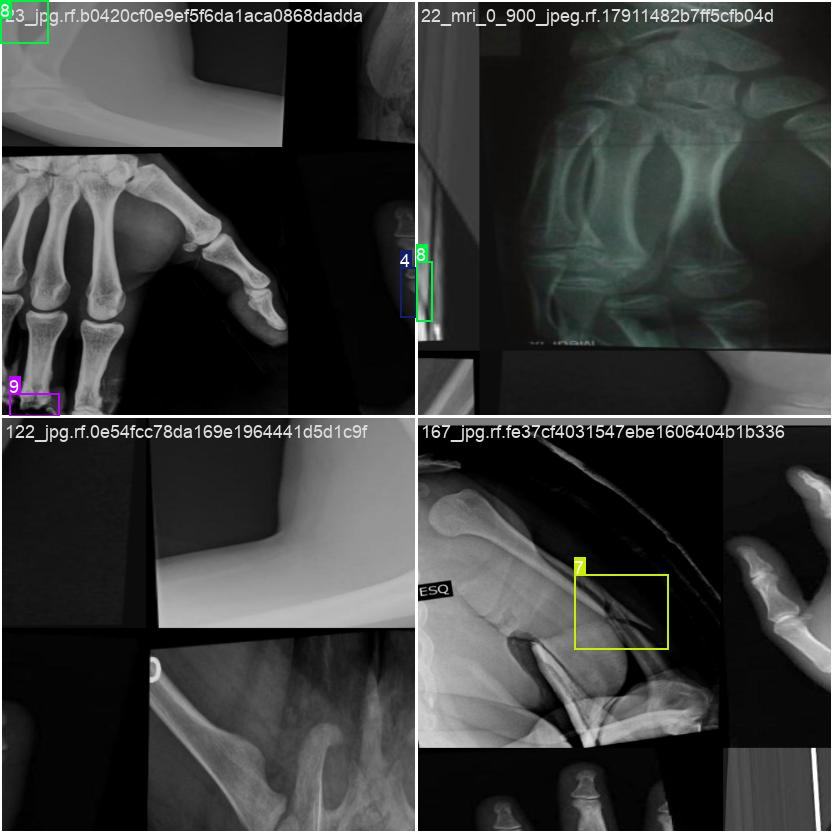

In [ ]:
display(Image(filename="/content/runs/detect/train/train_batch2.jpg", width=700))

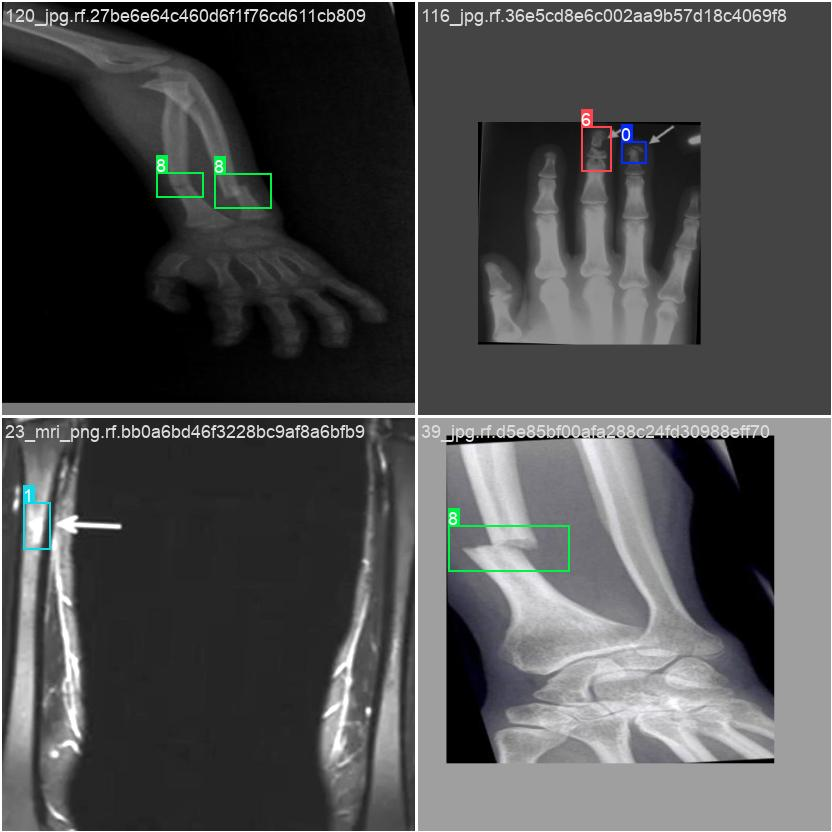

In [ ]:
display(Image(filename="/content/runs/detect/train/train_batch13480.jpg", width=700))

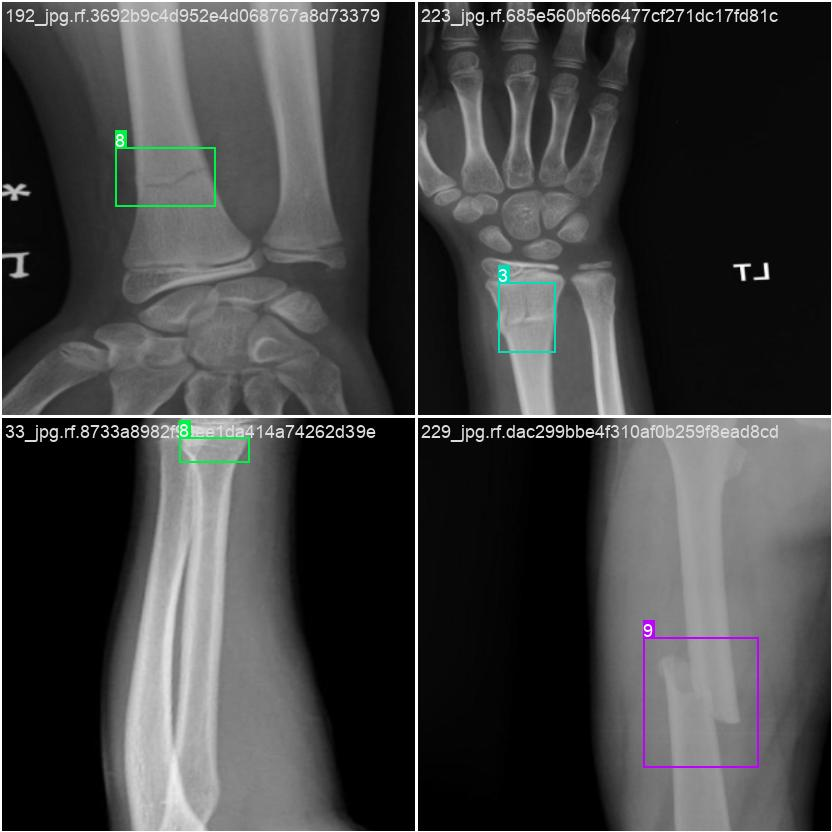

In [ ]:
display(Image(filename="/content/runs/detect/train/train_batch13481.jpg", width=700))

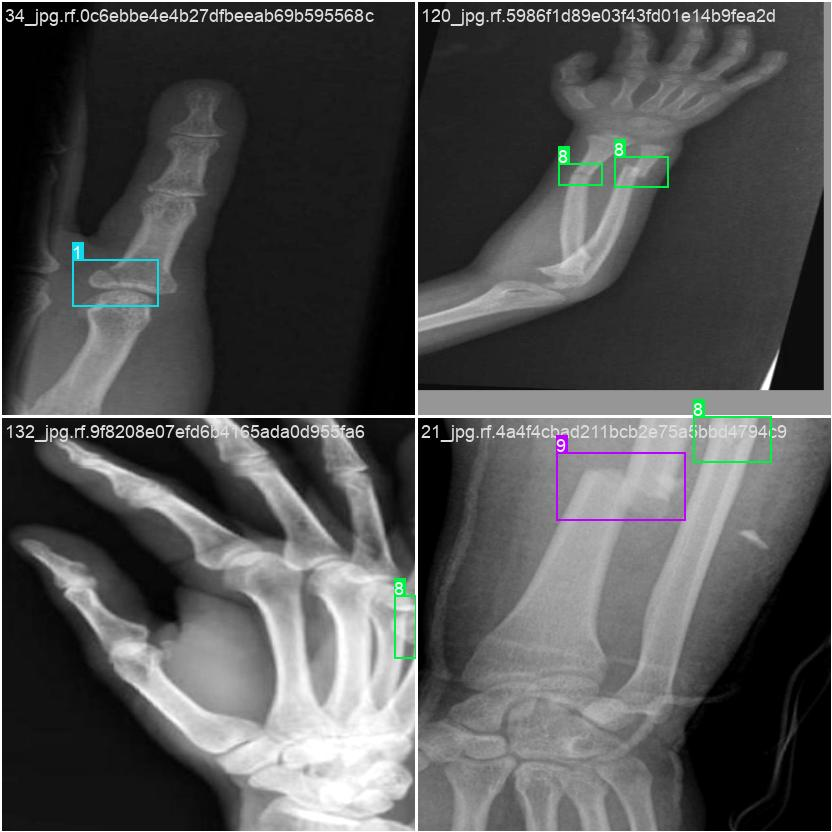

In [ ]:
display(Image(filename="/content/runs/detect/train/train_batch13482.jpg", width=700))

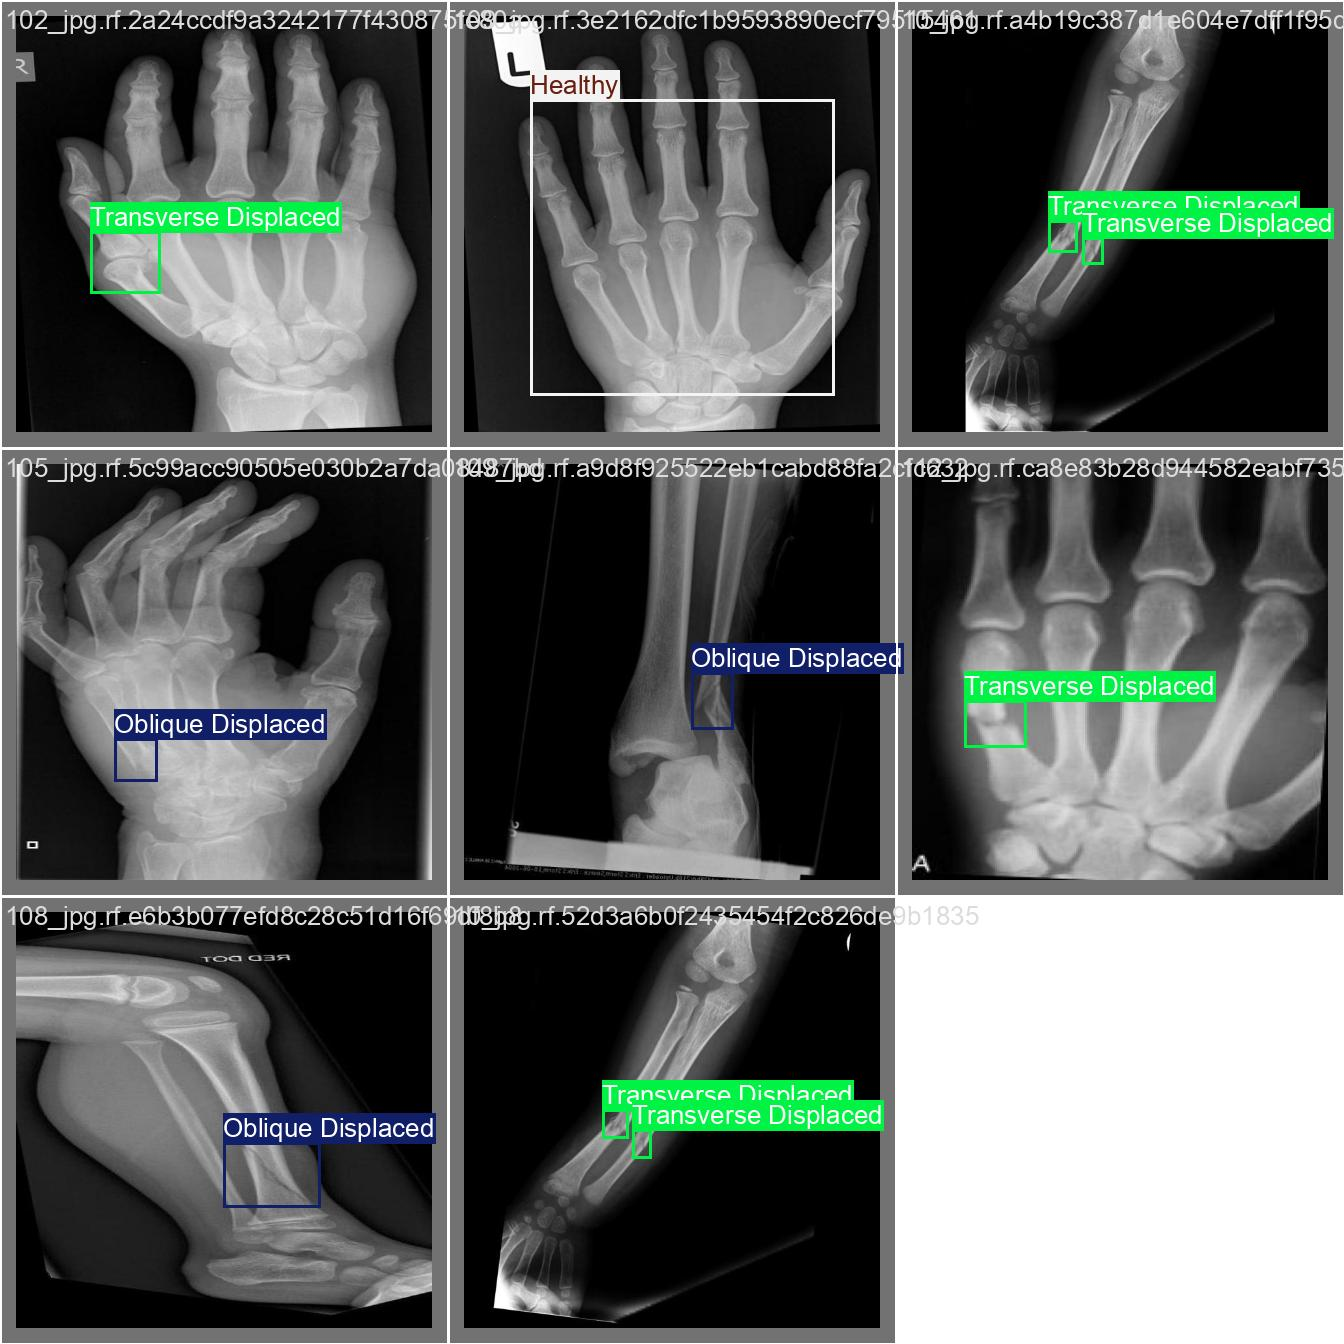

In [ ]:
display(Image(filename="/content/runs/detect/train/val_batch0_labels.jpg", width=700))

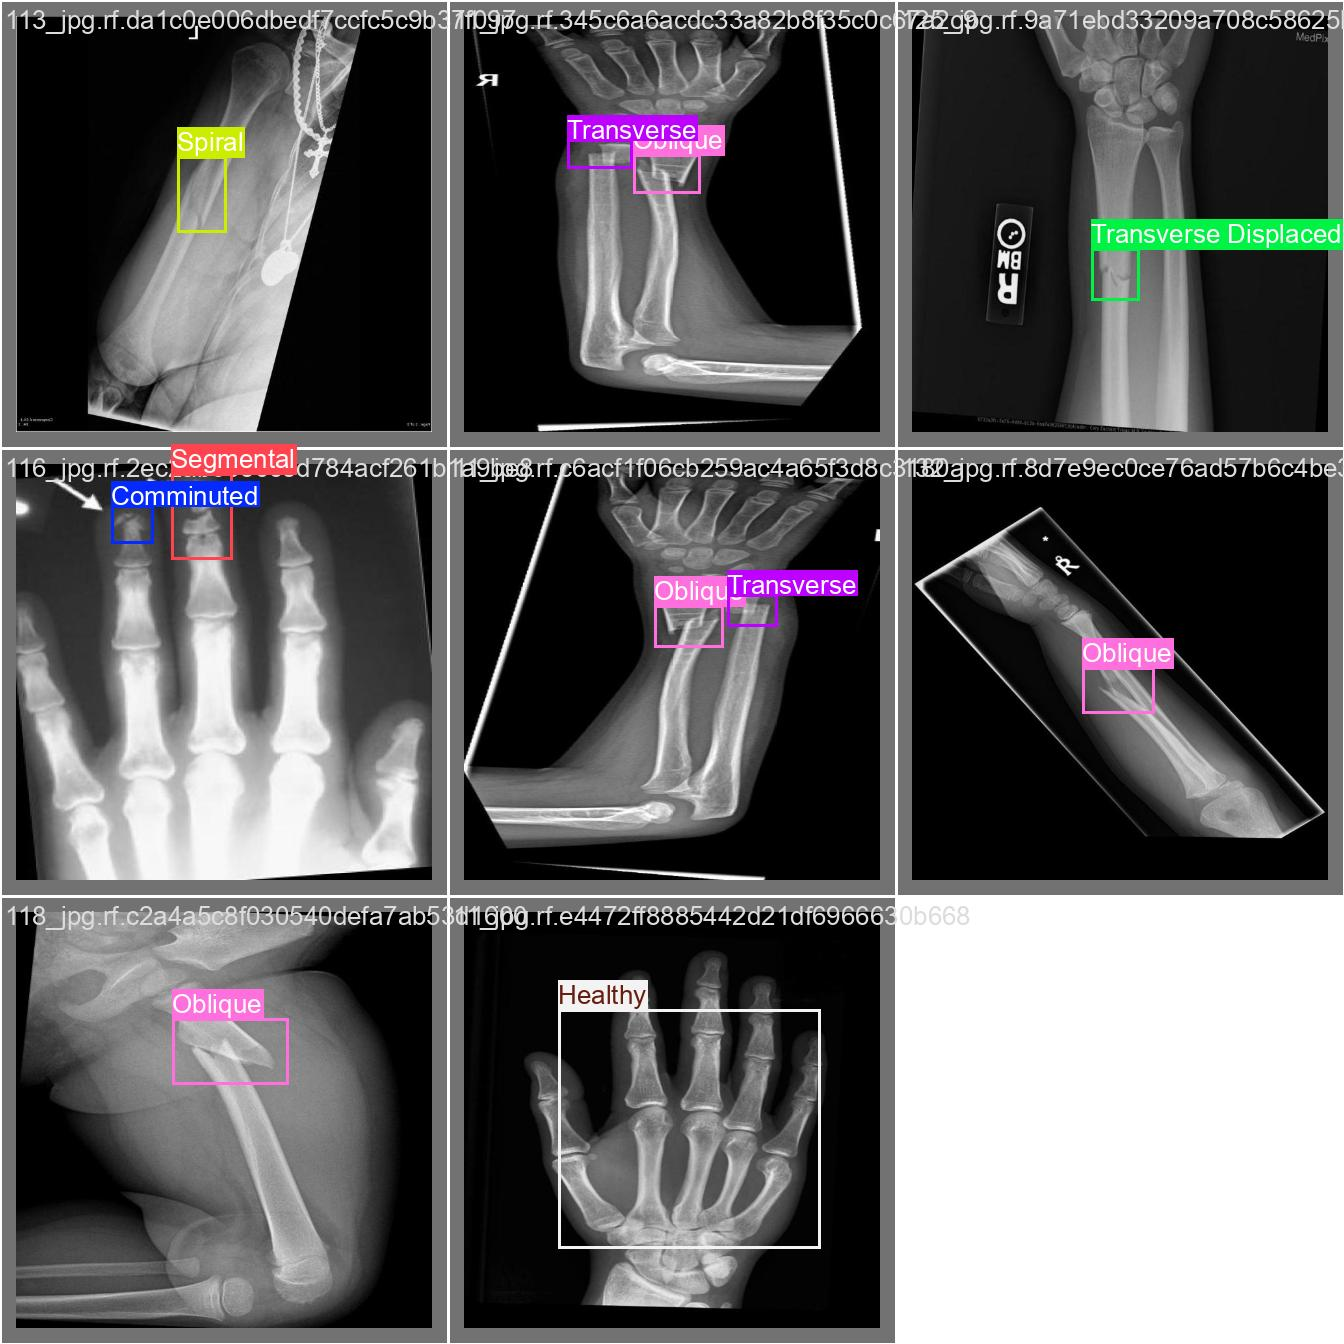

In [ ]:
display(Image(filename="/content/runs/detect/train/val_batch1_labels.jpg", width=700))

In [ ]:
from ultralytics import YOLO
from IPython.display import Image, display

# Best model load
model = YOLO("/content/runs/detect/train/weights/best.pt")

# Prediction
results = model.predict(source="/content/Human Bone Fractures Multi-modal Image Dataset (HBFMID)/Bone Fractures Detection/test/images/126_jpg.rf.3d8c5097b435e82708ce7e8426d0766d.jpg", save=True, conf=0.25)


image 1/1 /content/Human Bone Fractures Multi-modal Image Dataset (HBFMID)/Bone Fractures Detection/test/images/126_jpg.rf.3d8c5097b435e82708ce7e8426d0766d.jpg: 416x416 2 Oblique Displaceds, 186.5ms
Speed: 7.2ms preprocess, 186.5ms inference, 12.9ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/predict


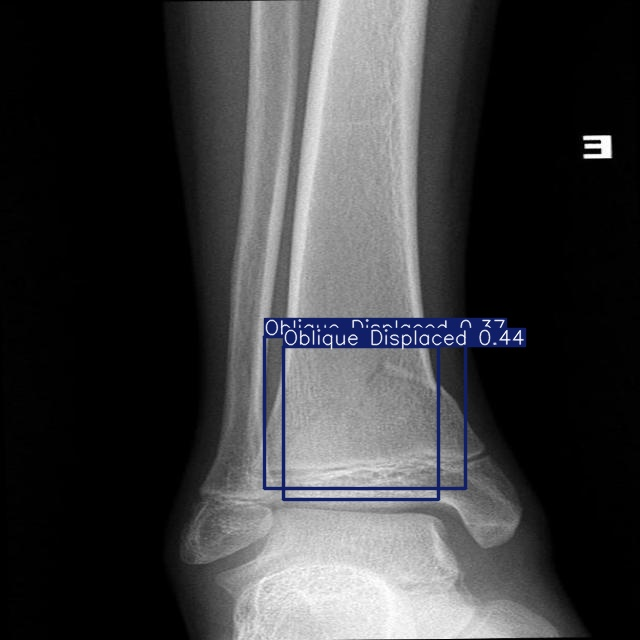

In [ ]:
# Display prediction
display(Image(filename='/content/runs/detect/predict/126_jpg.rf.3d8c5097b435e82708ce7e8426d0766d.jpg'))

In [ ]:
!ls runs/detect/train

args.yaml			 labels.jpg	       train_batch2.jpg
BoxF1_curve.png			 results.csv	       val_batch0_labels.jpg
BoxP_curve.png			 results.png	       val_batch0_pred.jpg
BoxPR_curve.png			 train_batch0.jpg      val_batch1_labels.jpg
BoxR_curve.png			 train_batch13480.jpg  val_batch1_pred.jpg
confusion_matrix_normalized.png  train_batch13481.jpg  val_batch2_labels.jpg
confusion_matrix.png		 train_batch13482.jpg  val_batch2_pred.jpg
labels_correlogram.jpg		 train_batch1.jpg      weights


In [ ]:
!ls runs/detect/train/weights

best.pt  last.pt


In [ ]:
!ls runs/detect/train

args.yaml			 labels.jpg	       train_batch2.jpg
BoxF1_curve.png			 results.csv	       val_batch0_labels.jpg
BoxP_curve.png			 results.png	       val_batch0_pred.jpg
BoxPR_curve.png			 train_batch0.jpg      val_batch1_labels.jpg
BoxR_curve.png			 train_batch13480.jpg  val_batch1_pred.jpg
confusion_matrix_normalized.png  train_batch13481.jpg  val_batch2_labels.jpg
confusion_matrix.png		 train_batch13482.jpg  val_batch2_pred.jpg
labels_correlogram.jpg		 train_batch1.jpg      weights


In [ ]:
from google.colab import files
files.download('runs/detect/train/weights/best.pt')  # atau 'last.pt' jika yang itu ingin diambil


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.download('runs/detect/train/weights/last.pt')  # atau 'last.pt' jika yang itu ingin diambil

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>